In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [5]:
ogrenciler = pd.read_csv("/Users/aytackolukisa/Desktop/Jupiter_Dosyaları/StudentsPerformance.csv")
ogrenciler.columns = ['cinsiyet', 'koken', 'aile_egt_seviyesi', 'ogle_yemegi', 
                              'hazirlik_kursu', 'matematik_notu', 'okuma_notu', 'yazma_notu']
ogrenciler.head(10)

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


Sınavlardaki performans cinsiyete, kökene ve anne-baba eğitim durumuna göre değişiklik göstermekte midir?

 ## CİNSİYET - BAŞARI İLİŞKİSİ

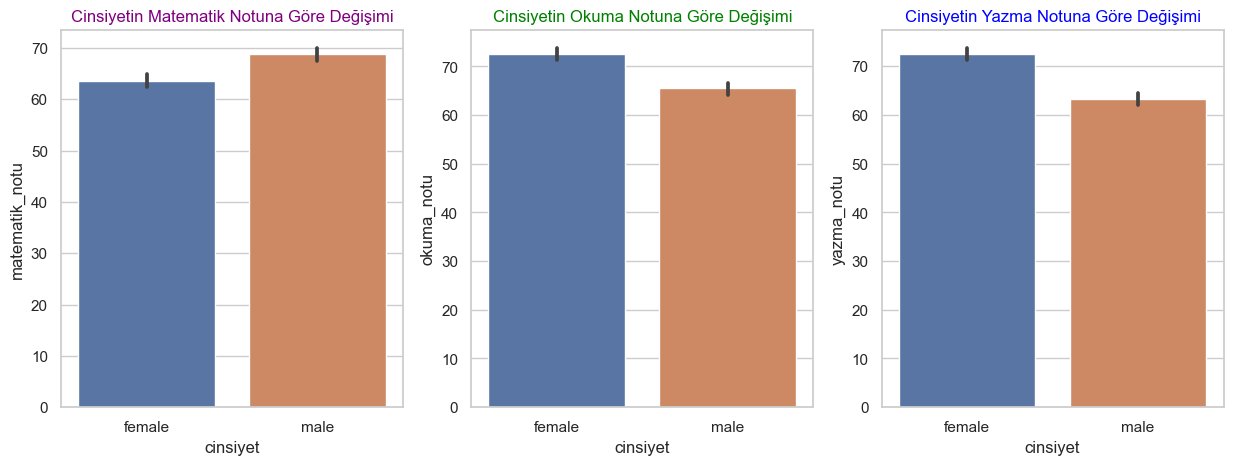

In [8]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.barplot(ogrenciler["cinsiyet"], ogrenciler["matematik_notu"])
plt.title("Cinsiyetin Matematik Notuna Göre Değişimi", color ="purple")

plt.subplot(1,3,2)
sns.barplot(ogrenciler["cinsiyet"], ogrenciler["okuma_notu"])
plt.title("Cinsiyetin Okuma Notuna Göre Değişimi", color ="green")

plt.subplot(1,3,3)
sns.barplot(ogrenciler["cinsiyet"], ogrenciler["yazma_notu"])
plt.title("Cinsiyetin Yazma Notuna Göre Değişimi", color ="blue")

plt.show()




### Soru-1 )
Matematik notu için erkekler Okuma ve Yazma notlari için kadınlar daha başarılı görünselerde aralarındaki fark afaki bir değer değildir. Bu sebepten ötürü başarı notlarının cinseyete bağlanması gerçekçi bir sonuç vermeyecektir.

 ## KÖKEN - BAŞARI İLİŞKİSİ

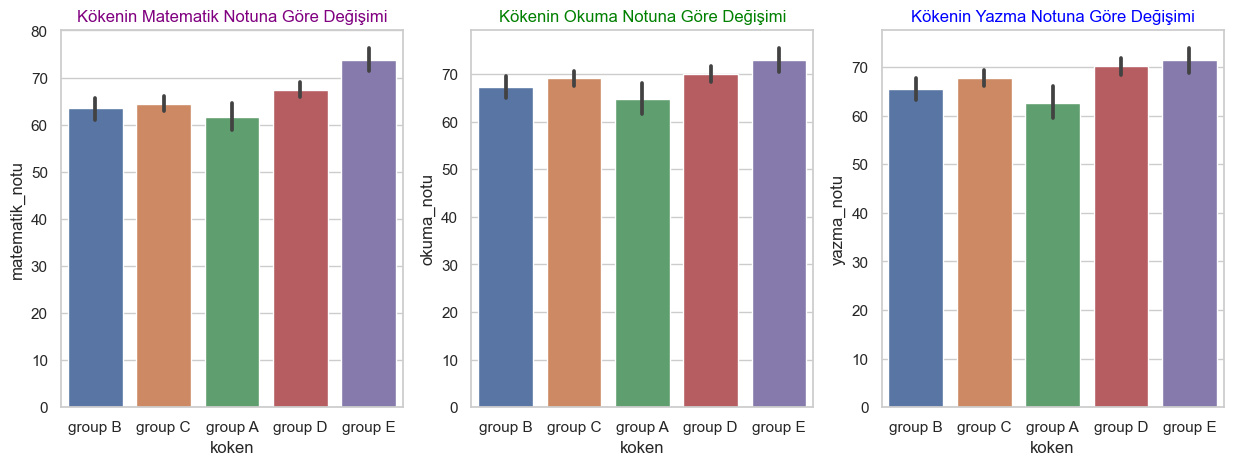

In [38]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.barplot(ogrenciler["koken"], ogrenciler["matematik_notu"])
plt.title("Kökenin Matematik Notuna Göre Değişimi", color ="purple")

plt.subplot(1,3,2)
sns.barplot(ogrenciler["koken"], ogrenciler["okuma_notu"])
plt.title("Kökenin Okuma Notuna Göre Değişimi", color ="green")

plt.subplot(1,3,3)
sns.barplot(ogrenciler["koken"], ogrenciler["yazma_notu"])
plt.title("Kökenin Yazma Notuna Göre Değişimi", color ="blue")

plt.show()

Tüm desler için deperlendirecek olursak; Group E kökenin deki öğrenciler en başarılı Group A kökenindeki öğrenciler ise en başarısız öğrenciler olduğu gözlenmektedir.

## ANNE BABA EĞİTİM - BAŞARI İLİŞKİSİ

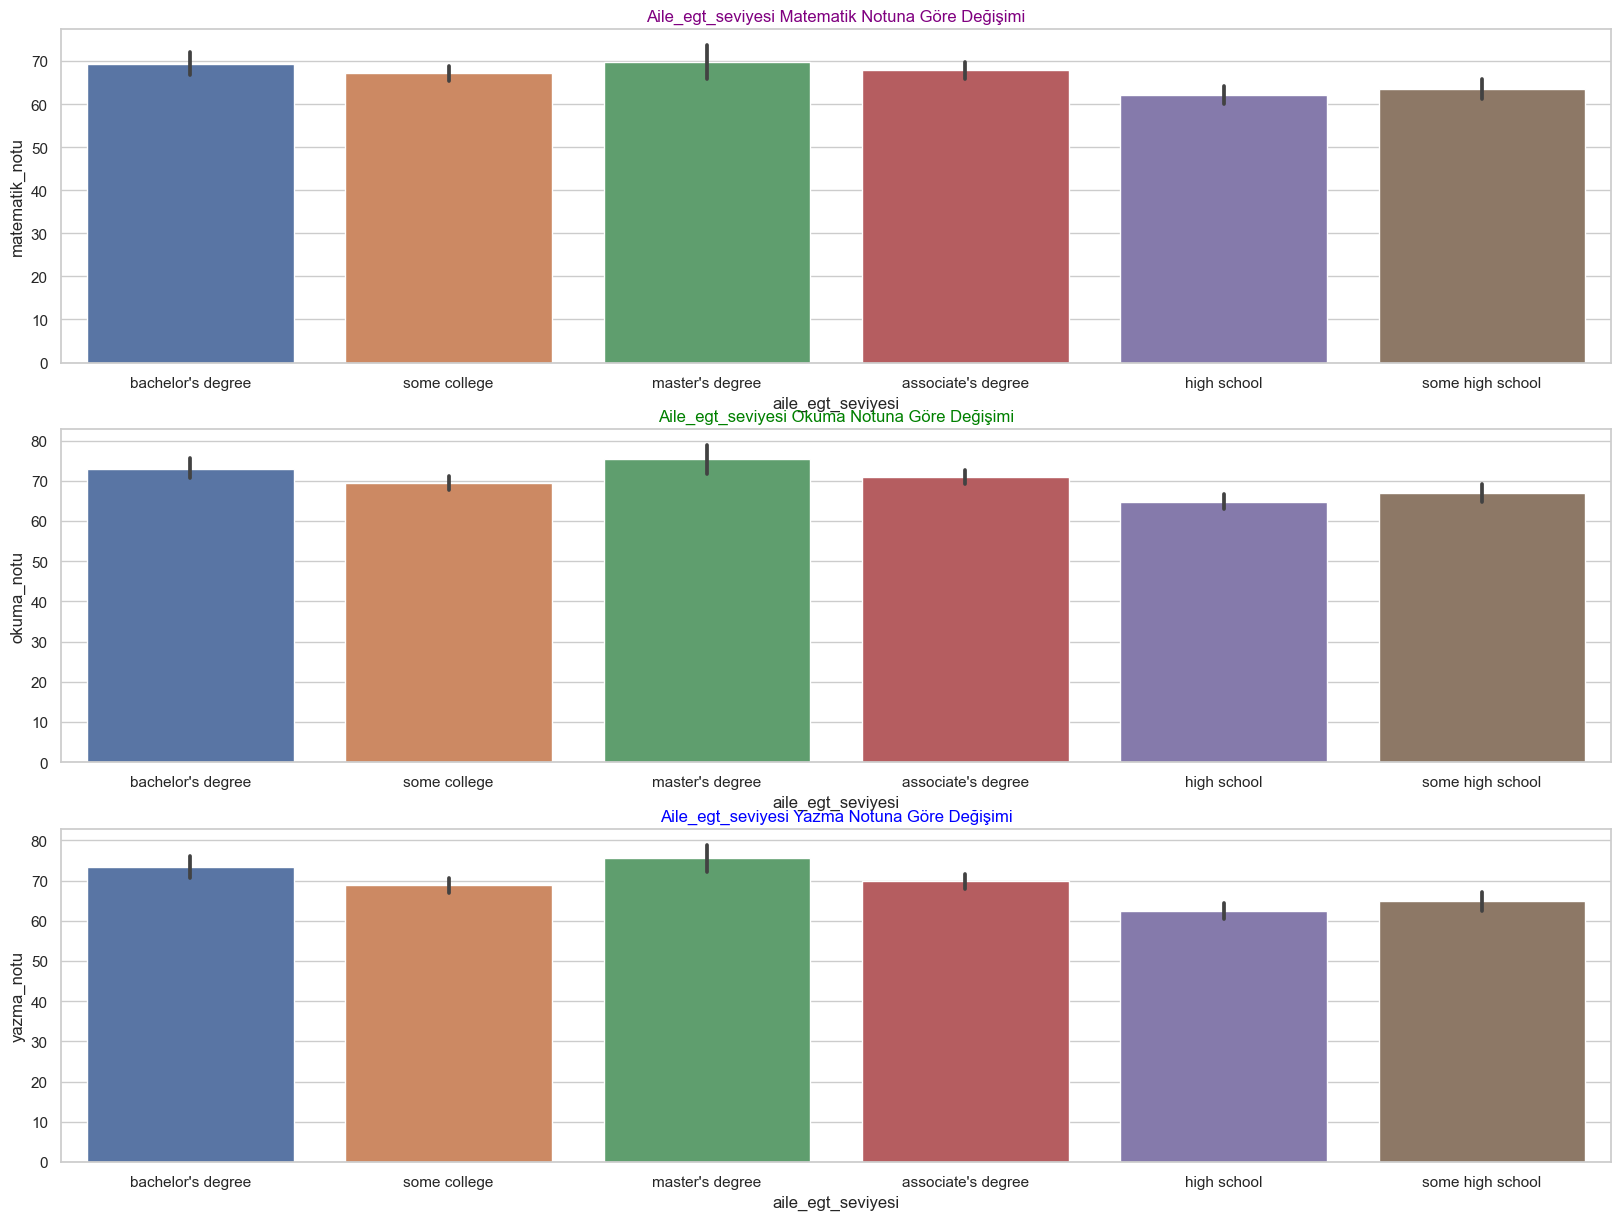

In [37]:
plt.figure(figsize = (20,15))

plt.subplot(3,1,1)
sns.barplot(ogrenciler["aile_egt_seviyesi"], ogrenciler["matematik_notu"])
plt.title("Aile_egt_seviyesi Matematik Notuna Göre Değişimi", color ="purple")

plt.subplot(3,1,2)
sns.barplot(ogrenciler["aile_egt_seviyesi"], ogrenciler["okuma_notu"])
plt.title("Aile_egt_seviyesi Okuma Notuna Göre Değişimi", color ="green")

plt.subplot(3,1,3)
sns.barplot(ogrenciler["aile_egt_seviyesi"], ogrenciler["yazma_notu"])
plt.title("Aile_egt_seviyesi Yazma Notuna Göre Değişimi", color ="blue")

plt.show()

Master's degree ile bachelor's degree olan okullarını bitiren anne babaların çocukları çok daha başarılı olmakla beraber high school ile some high school okullarını bitiren anne babaların çocukları başarısız oldukları görünüyor.

### Soru-2 )
Öğle yemek tipinin sınav performansları ile bir ilişkisi var mı? Varsa bunu nasıl açıklayabilirsiniz?

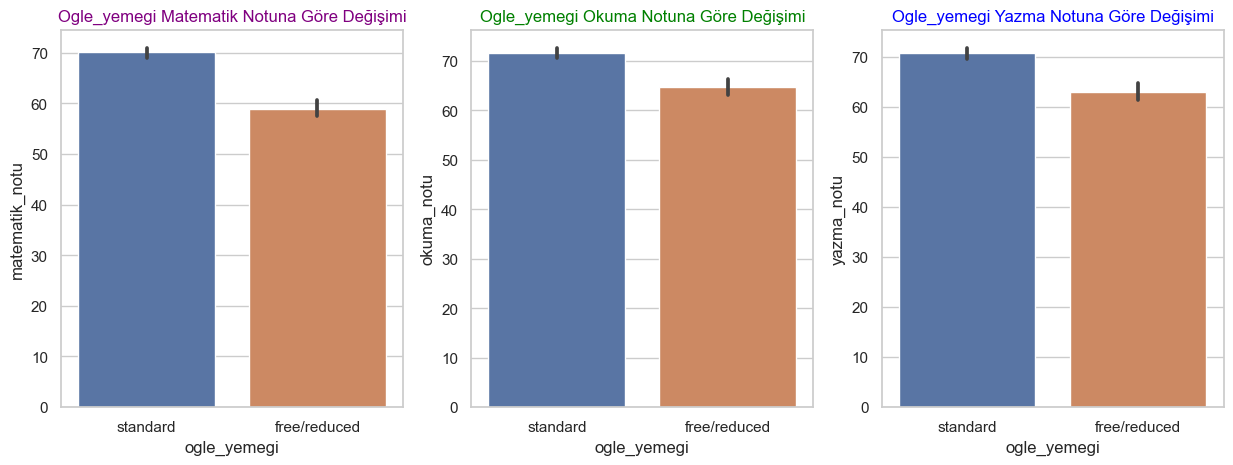

In [40]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.barplot(ogrenciler["ogle_yemegi"], ogrenciler["matematik_notu"])
plt.title("Ogle_yemegi Matematik Notuna Göre Değişimi", color ="purple")

plt.subplot(1,3,2)
sns.barplot(ogrenciler["ogle_yemegi"], ogrenciler["okuma_notu"])
plt.title("Ogle_yemegi Okuma Notuna Göre Değişimi", color ="green")

plt.subplot(1,3,3)
sns.barplot(ogrenciler["ogle_yemegi"], ogrenciler["yazma_notu"])
plt.title("Ogle_yemegi Yazma Notuna Göre Değişimi", color ="blue")

plt.show()

Standart öğle yemeği yiyen öğrenciler ücretsiz veya daraltılmış menü yiyenlere oranla daha başarılı. Bunun sebebi ekonemik durumun başarıya etkisi olarak düşünebiliriz. 

### Soru-3 )
Hazırlık kurslarının sonav performansı üzerinde bir etkisi var mı?

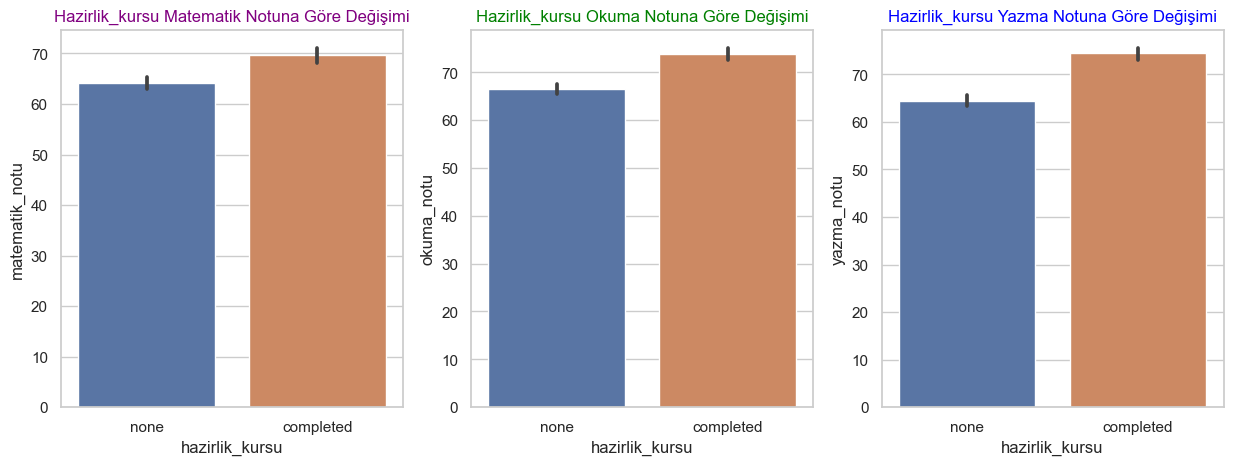

In [43]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.barplot(ogrenciler["hazirlik_kursu"], ogrenciler["matematik_notu"])
plt.title("Hazirlik_kursu Matematik Notuna Göre Değişimi", color ="purple")

plt.subplot(1,3,2)
sns.barplot(ogrenciler["hazirlik_kursu"], ogrenciler["okuma_notu"])
plt.title("Hazirlik_kursu Okuma Notuna Göre Değişimi", color ="green")

plt.subplot(1,3,3)
sns.barplot(ogrenciler["hazirlik_kursu"], ogrenciler["yazma_notu"])
plt.title("Hazirlik_kursu Yazma Notuna Göre Değişimi", color ="blue")

plt.show()

Hazırlık kursu alan öğrenciler daha başarılı olduğu tüm derslerde görünüyor.

### Soru-4 )
Birbiriyle korelasyonu en fazla olan dersler hangisidir?

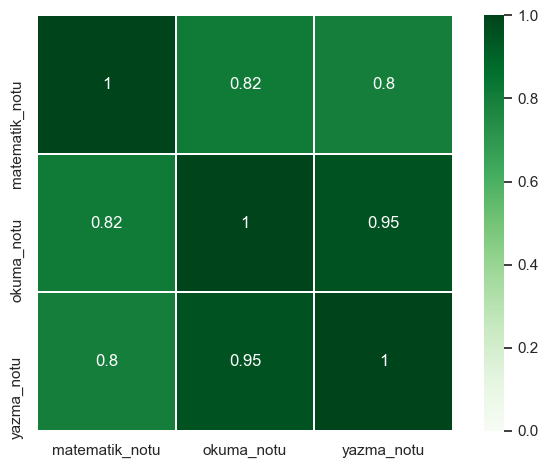

In [49]:
sns.heatmap(ogrenciler.corr(), square = True, annot=True, Linewidths = .5, vmin = 0, vmax = 1, cmap = "Greens")
plt.show()

Esasında tüm ders notları bir birileri ile korelasyonları son derece yüksek. Fakat illaki bir ayrım yapmamız gerekecekse yazma_notu ile okuma_notu arasında ki korelasyon en yüksek değere sahip.